In [22]:
import yfinance as yf
import pandas as pd

In [8]:
import yfinance as yf
import pandas as pd

# Define ticker symbols
nifty_ticker = "^NSEI"     # NIFTY 50
sp500_ticker = "^GSPC"     # S&P 500

# Define date range
start_date = "2015-03-01"
end_date = "2025-03-31"

# Download data
df_nifty = yf.download(nifty_ticker, start=start_date, end=end_date)
df_sp500 = yf.download(sp500_ticker, start=start_date, end=end_date)

# Reset index
df_nifty.reset_index(inplace=True)
df_sp500.reset_index(inplace=True)

# Show what columns are actually available
print("📌 NIFTY Columns:", df_nifty.columns.tolist())
print("📌 S&P 500 Columns:", df_sp500.columns.tolist())

# Define required columns (filter only those that exist)
required_cols = ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close']
nifty_cols = [col for col in required_cols if col in df_nifty.columns]
sp500_cols = [col for col in required_cols if col in df_sp500.columns]

# Keep only available columns
df_nifty = df_nifty[nifty_cols]
df_sp500 = df_sp500[sp500_cols]

# Check info and nulls
print("\n✅ NIFTY Data Info:")
print(df_nifty.info())
print("\nMissing values:\n", df_nifty.isnull().sum())

print("\n✅ S&P 500 Data Info:")
print(df_sp500.info())
print("\nMissing values:\n", df_sp500.isnull().sum())

# Save to CSV
df_nifty.to_csv("NIFTY_YFinance_2015_2025.csv", index=False)
df_sp500.to_csv("SP500_YFinance_2015_2025.csv", index=False)

print("\n✅ Data saved successfully.")


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

📌 NIFTY Columns: [('Date', ''), ('Close', '^NSEI'), ('High', '^NSEI'), ('Low', '^NSEI'), ('Open', '^NSEI'), ('Volume', '^NSEI')]
📌 S&P 500 Columns: [('Date', ''), ('Close', '^GSPC'), ('High', '^GSPC'), ('Low', '^GSPC'), ('Open', '^GSPC'), ('Volume', '^GSPC')]

✅ NIFTY Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2481 entries, 0 to 2480
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   (Date, )        2481 non-null   datetime64[ns]
 1   (Open, ^NSEI)   2481 non-null   float64       
 2   (High, ^NSEI)   2481 non-null   float64       
 3   (Low, ^NSEI)    2481 non-null   float64       
 4   (Close, ^NSEI)  2481 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 97.0 KB
None

Missing values:
 Price  Ticker
Date             0
Open   ^NSEI     0
High   ^NSEI     0
Low    ^NSEI     0
Close  ^NSEI     0
dtype: int64

✅ S&P 500 Data Info:
<class 'pandas.core.fra

In [9]:
# Extract only the 'Close' column
df_nifty_close = df_nifty[['Date', 'Close']]
df_sp500_close = df_sp500[['Date', 'Close']]

# Save to CSV files
df_nifty_close.to_csv("NIFTY_Close_Prices.csv", index=False)
df_sp500_close.to_csv("SP500_Close_Prices.csv", index=False)

print("\n✅ Closing price data saved successfully.")



✅ Closing price data saved successfully.


In [10]:
# Install necessary package
!pip install pmdarima

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Data manipulation and analysis libraries
import numpy as np
import pandas as pd

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Time series analysis libraries
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima

# Evaluation metrics libraries
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [11]:
# Convert 'Date' column to datetime format
df_nifty['Date'] = pd.to_datetime(df_nifty['Date'])
df_sp500['Date'] = pd.to_datetime(df_sp500['Date'])

# Set 'Date' column as index and sort it
df_nifty.set_index('Date', inplace=True)
df_nifty.sort_index(inplace=True)

df_sp500.set_index('Date', inplace=True)
df_sp500.sort_index(inplace=True)

# Display sample data
print("\n📌 NIFTY Data Sample:\n", df_nifty.sample(5))
print("\n📌 S&P 500 Data Sample:\n", df_sp500.sample(5))



📌 NIFTY Data Sample:
 Price               Open          High           Low         Close
Ticker             ^NSEI         ^NSEI         ^NSEI         ^NSEI
Date                                                              
2017-03-29   9128.700195   9153.150391   9109.099609   9143.799805
2022-05-27  16296.599609  16370.599609  16221.950195  16352.450195
2023-09-05  19564.650391  19587.050781  19525.750000  19574.900391
2022-06-15  15729.250000  15783.650391  15678.900391  15692.150391
2018-06-18  10830.200195  10830.200195  10787.349609  10799.849609

📌 S&P 500 Data Sample:
 Price              Open         High          Low        Close
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC
Date                                                          
2018-02-23  2715.800049  2747.760010  2713.739990  2747.300049
2019-12-05  3119.209961  3119.449951  3103.760010  3117.429932
2015-04-09  2081.290039  2093.310059  2074.290039  2091.179932
2018-10-25  2674.879883  2722.699951  

<Figure size 1800x800 with 0 Axes>

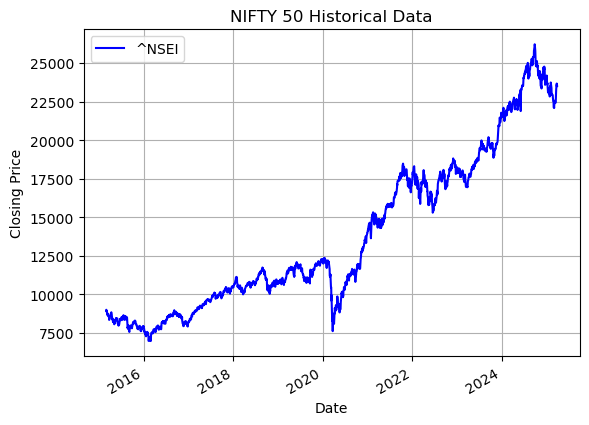

<Figure size 1800x800 with 0 Axes>

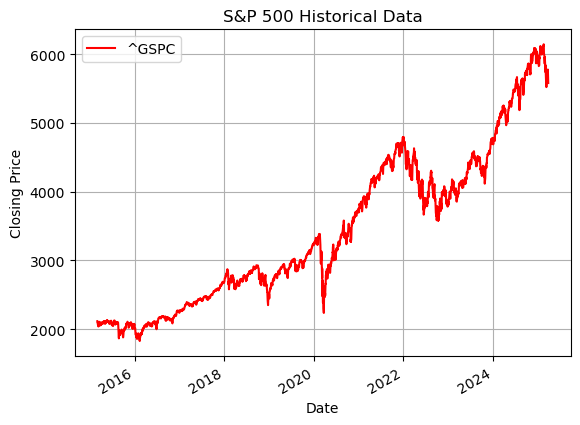

In [12]:
import matplotlib.pyplot as plt

# Plot NIFTY 50 closing prices
plt.figure(figsize=(18, 8))
df_nifty['Close'].plot(label='NIFTY 50', color='blue')
plt.title('NIFTY 50 Historical Data')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

# Plot S&P 500 closing prices
plt.figure(figsize=(18, 8))
df_sp500['Close'].plot(label='S&P 500', color='red')
plt.title('S&P 500 Historical Data')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()


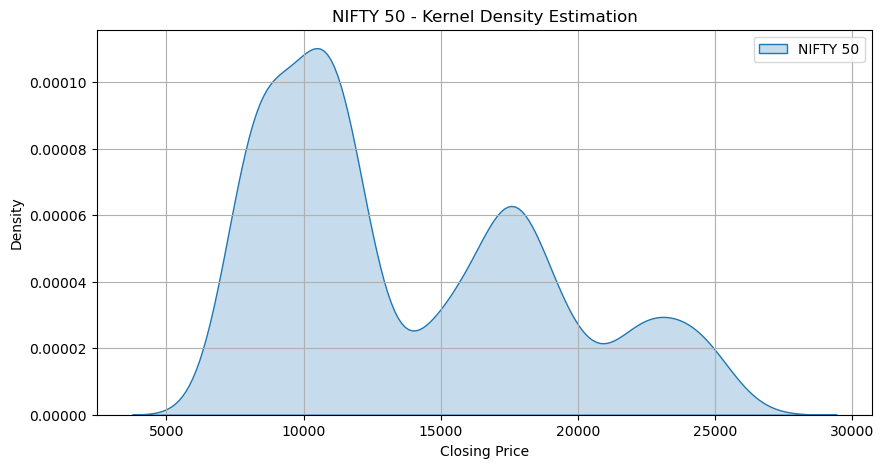

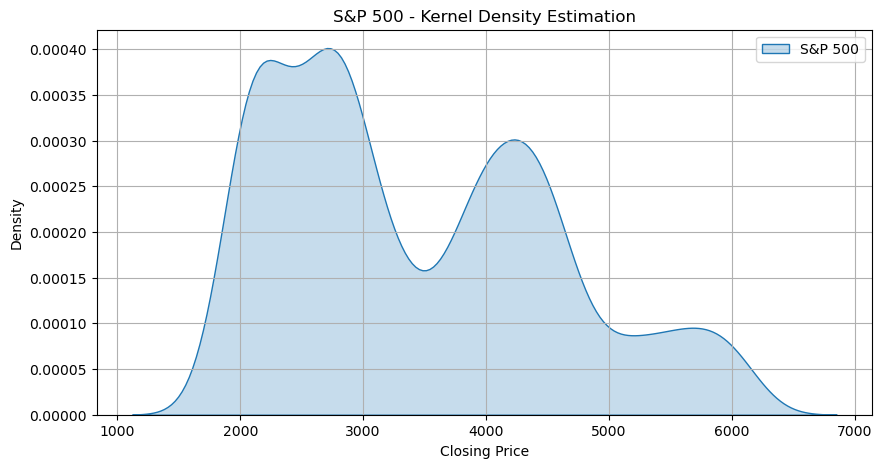

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# KDE plot for NIFTY 50
plt.figure(figsize=(10, 5))
sns.kdeplot(df_nifty['Close'], shade=True, color="blue", label="NIFTY 50")
plt.title('NIFTY 50 - Kernel Density Estimation')
plt.xlabel('Closing Price')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

# KDE plot for S&P 500
plt.figure(figsize=(10, 5))
sns.kdeplot(df_sp500['Close'], shade=True, color="red", label="S&P 500")
plt.title('S&P 500 - Kernel Density Estimation')
plt.xlabel('Closing Price')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


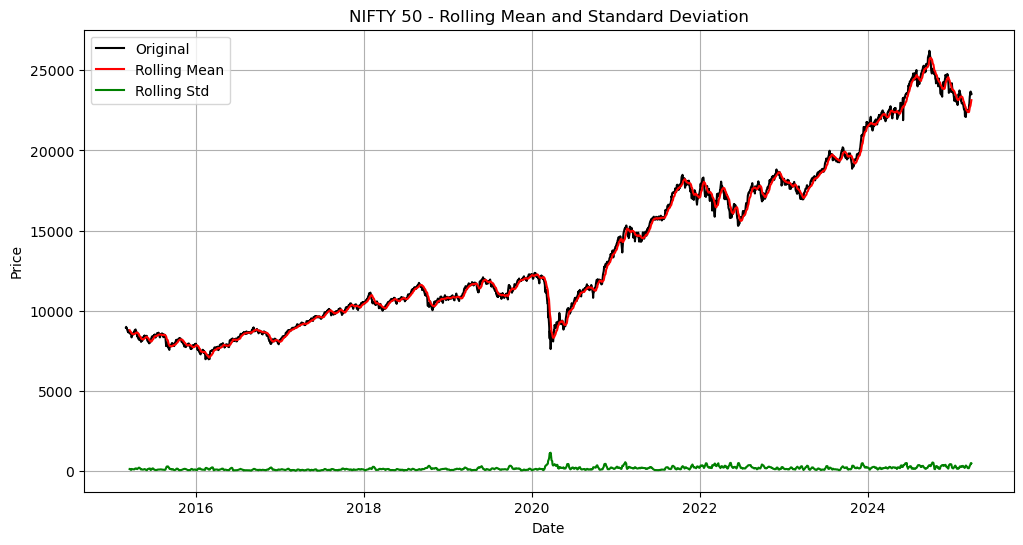

Results of Dickey-Fuller Test for NIFTY 50:
Test Statistic                    0.334079
p-value                           0.978855
No. of Lags Used                  0.000000
Number of Observations Used    2480.000000
Critical Value (1%)              -3.432990
Critical Value (5%)              -2.862706
Critical Value (10%)             -2.567391
dtype: float64

------------



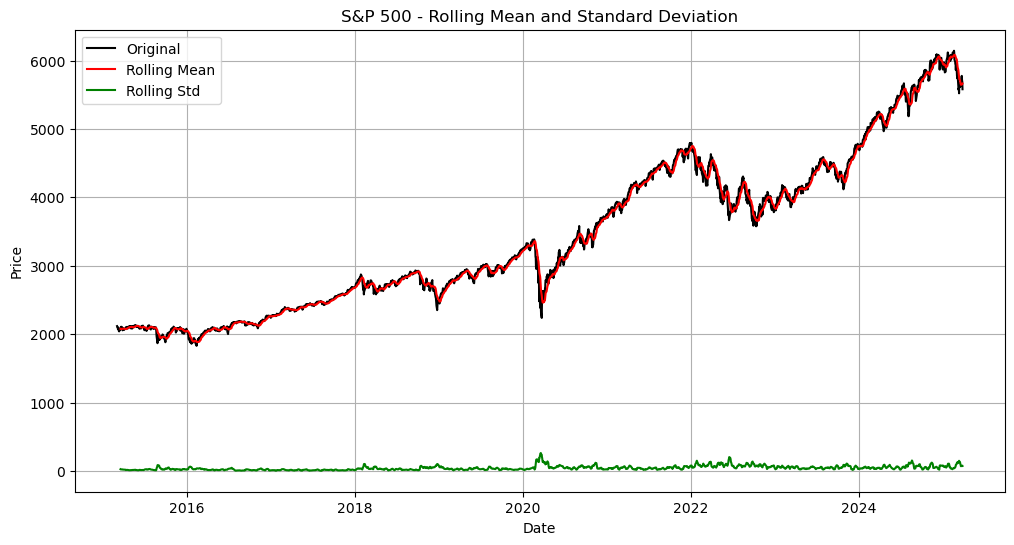

Results of Dickey-Fuller Test for S&P 500:
Test Statistic                   -0.085651
p-value                           0.950849
No. of Lags Used                 10.000000
Number of Observations Used    2525.000000
Critical Value (1%)              -3.432942
Critical Value (5%)              -2.862685
Critical Value (10%)             -2.567380
dtype: float64

------------



In [14]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

# Function to test stationarity
def test_stationarity(timeseries, title):
    # Define rolling window size
    rolling_window = 12

    # Compute rolling statistics
    rolmean = timeseries.rolling(window=rolling_window).mean()
    rolstd = timeseries.rolling(window=rolling_window).std()

    # Plot rolling statistics
    plt.figure(figsize=(12, 6))
    plt.plot(timeseries, color='black', label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='green', label='Rolling Std')
    plt.legend(loc='best')
    plt.title(f'{title} - Rolling Mean and Standard Deviation')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()

    # Perform Dickey-Fuller test
    print(f"Results of Dickey-Fuller Test for {title}:")
    adf_test = adfuller(timeseries, autolag='AIC')
    output = pd.Series(adf_test[0:4], index=['Test Statistic', 'p-value', 'No. of Lags Used', 'Number of Observations Used'])

    # Print critical values
    for key, value in adf_test[4].items():
        output[f'Critical Value ({key})'] = value
    
    print(output)
    print("\n" + "-"*12 + "\n")

# Apply the function to both indices
test_stationarity(df_nifty['Close'], "NIFTY 50")
test_stationarity(df_sp500['Close'], "S&P 500")


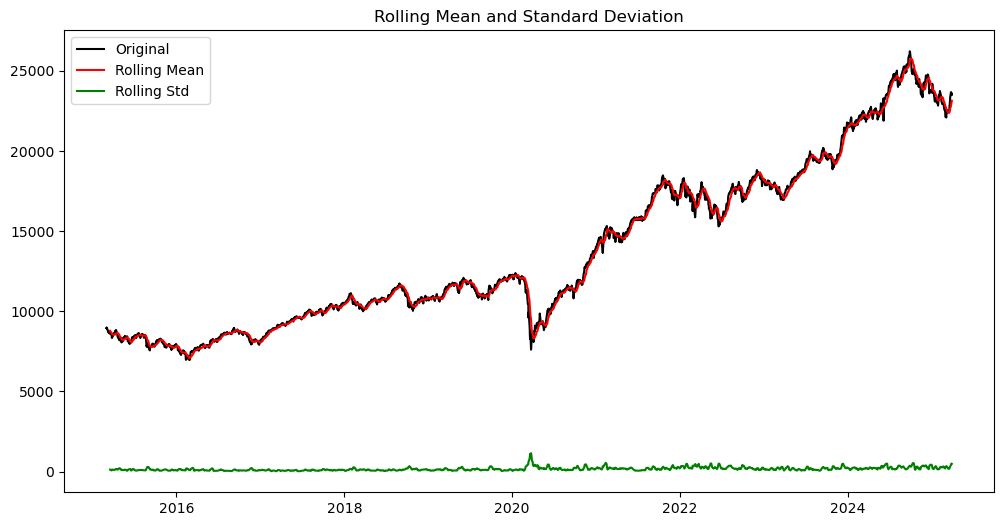

Results of Dickey-Fuller Test:
Test Statistics                   0.334079
p-value                           0.978855
No. of lags used                  0.000000
Number of observations used    2480.000000
Critical value (1%)              -3.432990
Critical value (5%)              -2.862706
Critical value (10%)             -2.567391
dtype: float64


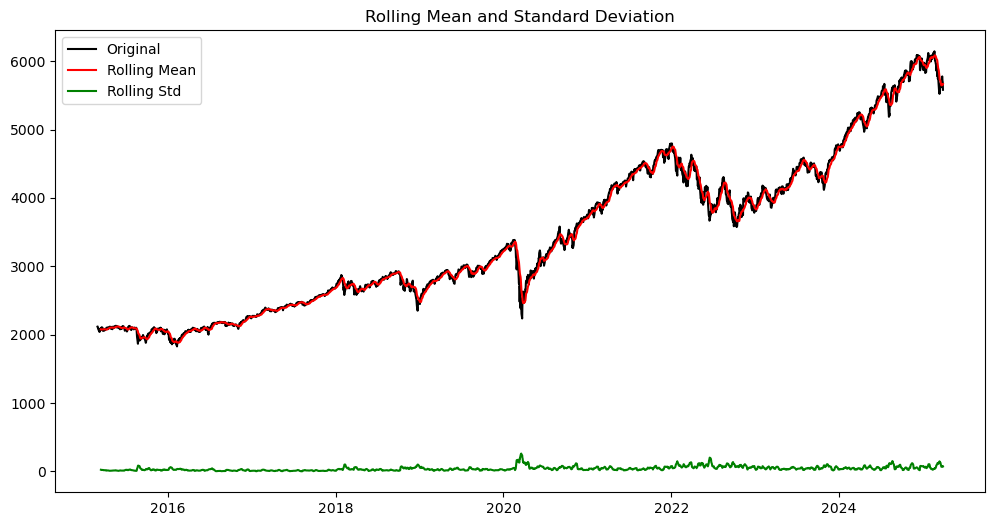

Results of Dickey-Fuller Test:
Test Statistics                  -0.085651
p-value                           0.950849
No. of lags used                 10.000000
Number of observations used    2525.000000
Critical value (1%)              -3.432942
Critical value (5%)              -2.862685
Critical value (10%)             -2.567380
dtype: float64


In [15]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

def test_stationarity(timeseries):
    # Definition of rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    # Create a graph of moving statistics
    plt.figure(figsize=(12, 6))
    plt.plot(timeseries, color='black', label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='green', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show()

    # Test for stationarity with the Dickey-Fuller test
    print("Results of Dickey-Fuller Test:")
    adft = adfuller(timeseries, autolag='AIC')
    output = pd.Series(adft[0:4], index=['Test Statistics', 'p-value', 'No. of lags used', 'Number of observations used'])
    
    for key, value in adft[4].items():
        output[f'Critical value ({key})'] = value

    print(output)

# Apply to NIFTY 50
test_stationarity(df_nifty['Close'])

# Apply to S&P 500
test_stationarity(df_sp500['Close'])


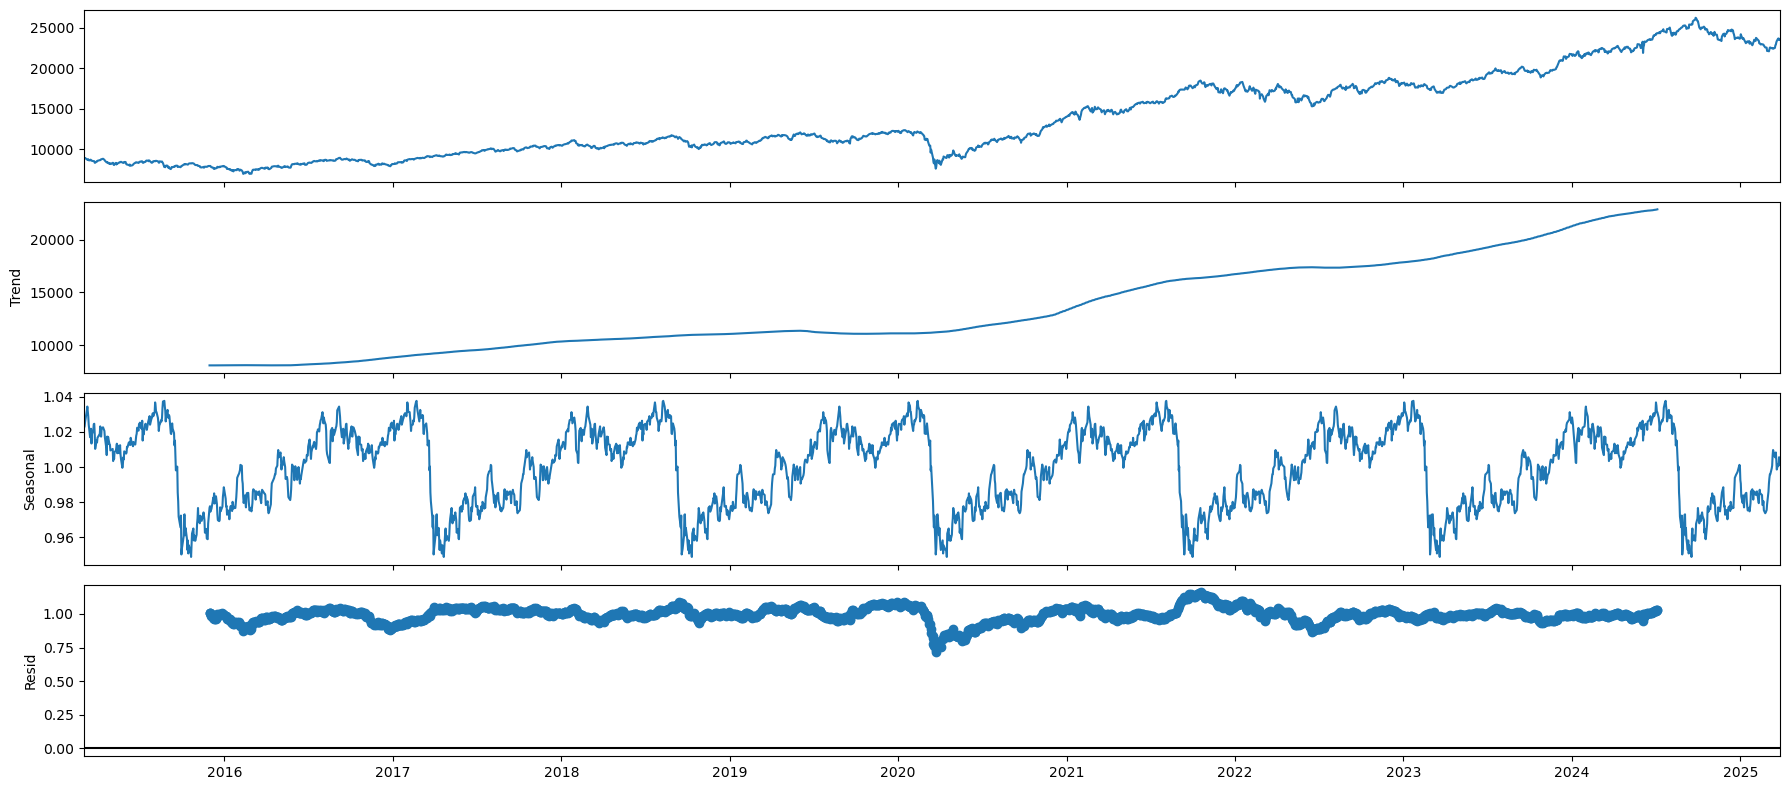

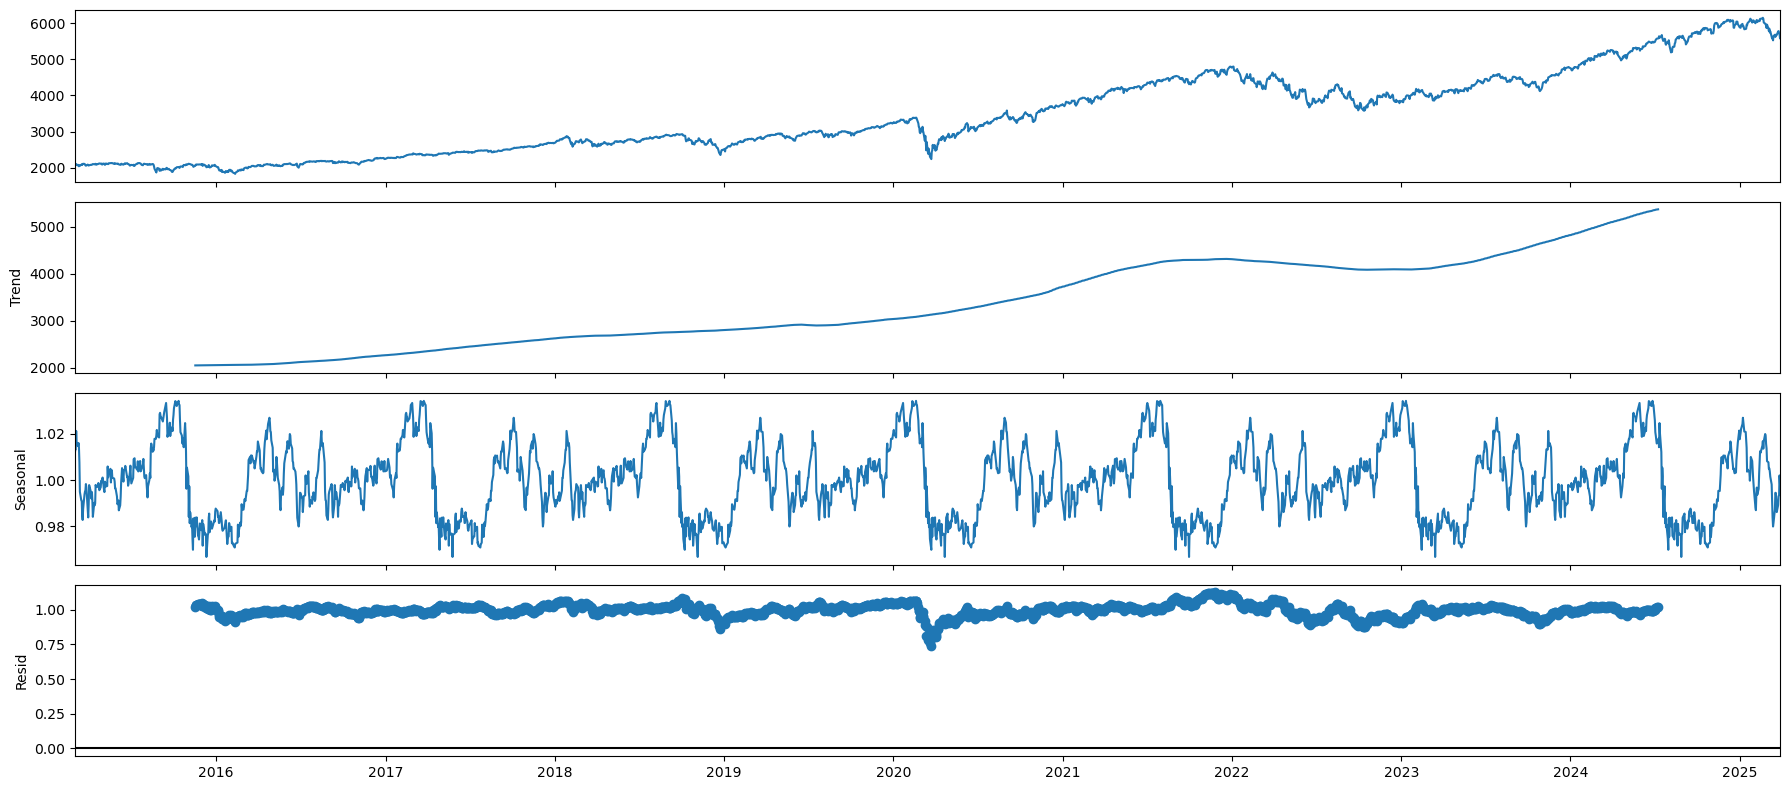

In [58]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Apply seasonal decomposition for NIFTY 50
result_nifty = seasonal_decompose(df_nifty['Close'], model='multiplicative', period=365)

# Visualization of decomposition results
with plt.rc_context({'figure.figsize': (18, 8)}):
    fig = result_nifty.plot()

# Differentiation to achieve stationarity
df_nifty_diff = df_nifty['Close'].diff().dropna()

# Apply seasonal decomposition for S&P 500
result_sp500 = seasonal_decompose(df_sp500['Close'], model='multiplicative', period=365)

# Visualization of decomposition results
with plt.rc_context({'figure.figsize': (18, 8)}):
    fig = result_sp500.plot()

# Differentiation to achieve stationarity
df_sp500_diff = df_sp500['Close'].diff().dropna()


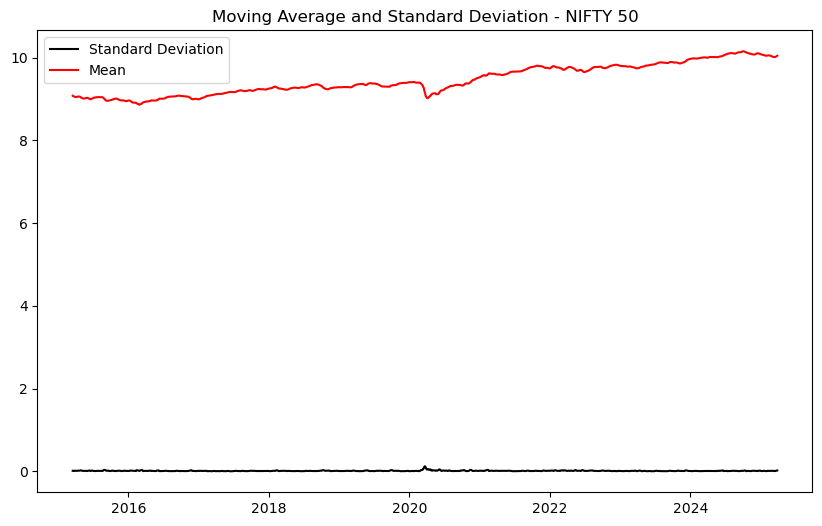

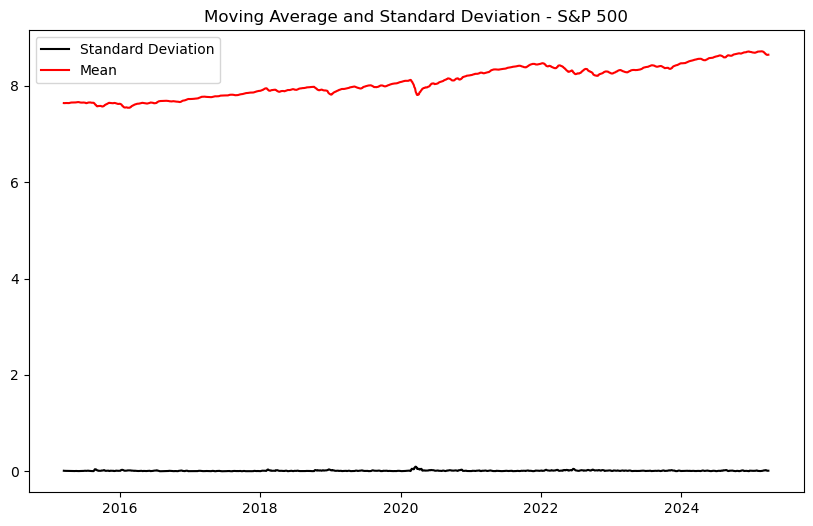

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Set the size of the chart shape
plt.figure(figsize=(10, 6))

# Apply a logarithmic transformation to the time series for NIFTY 50
df_nifty_log = np.log(df_nifty['Close'])

# Calculate moving average and standard deviation
window = 12
moving_avg_nifty = df_nifty_log.rolling(window).mean()
std_dev_nifty = df_nifty_log.rolling(window).std()

# Plot moving average and standard deviation charts for NIFTY 50
plt.plot(std_dev_nifty, color="black", label="Standard Deviation")
plt.plot(moving_avg_nifty, color="red", label="Mean")

# Chart legend and title settings
plt.legend(loc="best")
plt.title("Moving Average and Standard Deviation - NIFTY 50")
plt.show()

# Repeat for S&P 500
plt.figure(figsize=(10, 6))

# Apply a logarithmic transformation to the time series for S&P 500
df_sp500_log = np.log(df_sp500['Close'])

# Calculate moving average and standard deviation
moving_avg_sp500 = df_sp500_log.rolling(window).mean()
std_dev_sp500 = df_sp500_log.rolling(window).std()

# Plot moving average and standard deviation charts for S&P 500
plt.plot(std_dev_sp500, color="black", label="Standard Deviation")
plt.plot(moving_avg_sp500, color="red", label="Mean")

# Chart legend and title settings
plt.legend(loc="best")
plt.title("Moving Average and Standard Deviation - S&P 500")
plt.show()


In [60]:
from statsmodels.tsa.stattools import adfuller

# Define ADF test function
def test_stationarity(timeseries, name):
    result = adfuller(timeseries, autolag='AIC')
    print(f"\nADF Test for {name}:")
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"   {key}: {value}")

# ----------------------------
# For NIFTY 50
# ----------------------------

# Calculate the difference between df_nifty_log and moving average
data_nifty_log_minus_mean = df_nifty_log - moving_avg_nifty

# Remove NaN values
data_nifty_log_minus_mean.dropna(inplace=True)

# Perform the ADF test
test_stationarity(data_nifty_log_minus_mean, "NIFTY 50")

# ----------------------------
# For S&P 500
# ----------------------------

# Calculate the difference between df_sp500_log and moving average
data_sp500_log_minus_mean = df_sp500_log - moving_avg_sp500

# Remove NaN values
data_sp500_log_minus_mean.dropna(inplace=True)

# Perform the ADF test
test_stationarity(data_sp500_log_minus_mean, "S&P 500")



ADF Test for NIFTY 50:
ADF Statistic: -10.851898443759358
p-value: 1.5213311321903778e-19
Critical Values:
   1%: -3.4330142837064934
   5%: -2.8627170573350926
   10%: -2.567396594735101

ADF Test for S&P 500:
ADF Statistic: -11.525218711986955
p-value: 3.951205153410912e-21
Critical Values:
   1%: -3.432954851668868
   5%: -2.862690812247962
   10%: -2.5673826214832887



ADF Test for NIFTY 50:
ADF Statistic: -10.851898443759358
p-value: 1.5213311321903778e-19
Critical Values:
   1%: -3.4330142837064934
   5%: -2.8627170573350926
   10%: -2.567396594735101


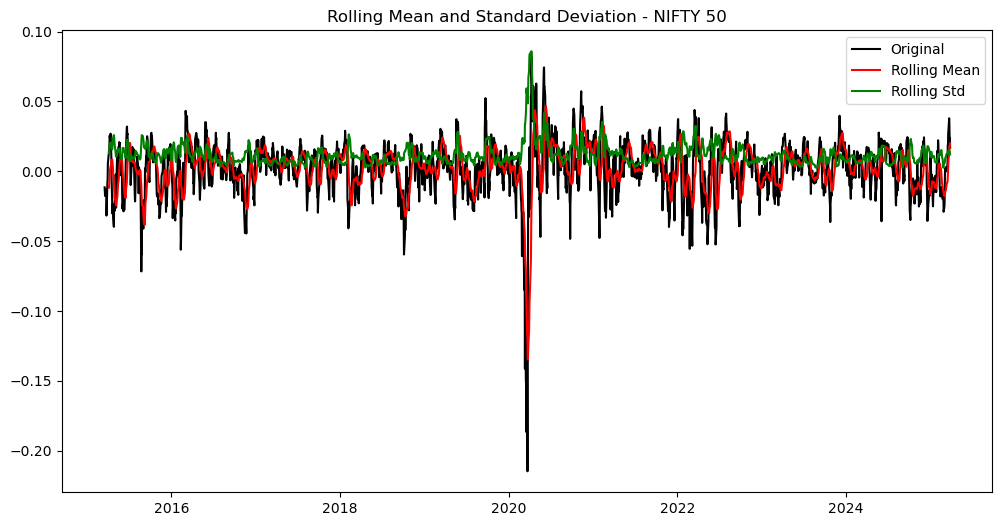


ADF Test for S&P 500:
ADF Statistic: -11.525218711986955
p-value: 3.951205153410912e-21
Critical Values:
   1%: -3.432954851668868
   5%: -2.862690812247962
   10%: -2.5673826214832887


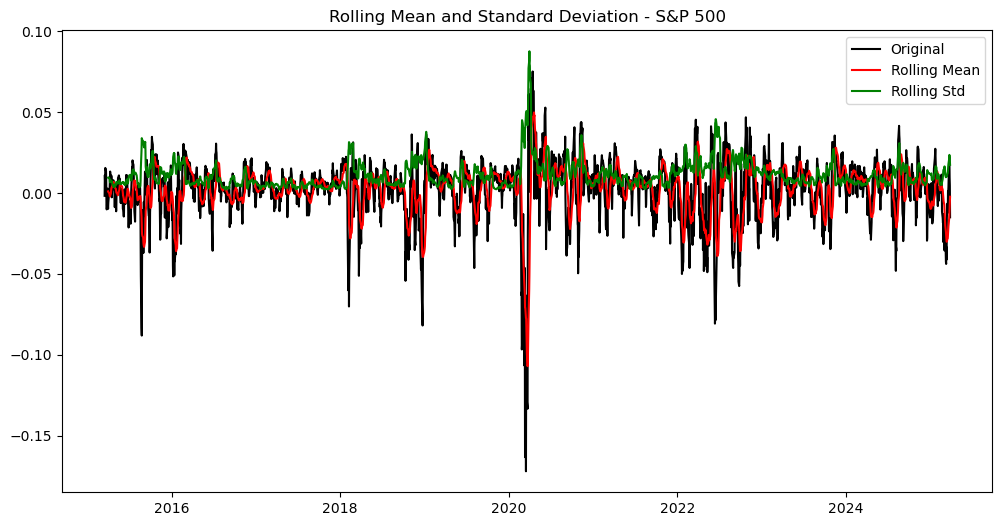

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# ----------------------------
# Define ADF test function
# ----------------------------
def test_stationarity(timeseries, name):
    result = adfuller(timeseries, autolag='AIC')
    print(f"\nADF Test for {name}:")
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"   {key}: {value}")

# ----------------------------
# For NIFTY 50
# ----------------------------

# Calculate the difference between df_nifty_log and moving average
data_nifty_log_minus_mean = df_nifty_log - moving_avg_nifty

# Remove NaN values
data_nifty_log_minus_mean.dropna(inplace=True)

# Perform the ADF test
test_stationarity(data_nifty_log_minus_mean, "NIFTY 50")

# Plot rolling mean and std
rolling_mean_nifty = data_nifty_log_minus_mean.rolling(window=12).mean()
rolling_std_nifty = data_nifty_log_minus_mean.rolling(window=12).std()

plt.figure(figsize=(12, 6))
plt.plot(data_nifty_log_minus_mean, color='black', label='Original')
plt.plot(rolling_mean_nifty, color='red', label='Rolling Mean')
plt.plot(rolling_std_nifty, color='green', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation - NIFTY 50')
plt.show()

# ----------------------------
# For S&P 500
# ----------------------------

# Calculate the difference between df_sp500_log and moving average
data_sp500_log_minus_mean = df_sp500_log - moving_avg_sp500

# Remove NaN values
data_sp500_log_minus_mean.dropna(inplace=True)

# Perform the ADF test
test_stationarity(data_sp500_log_minus_mean, "S&P 500")

# Plot rolling mean and std
rolling_mean_sp500 = data_sp500_log_minus_mean.rolling(window=12).mean()
rolling_std_sp500 = data_sp500_log_minus_mean.rolling(window=12).std()

plt.figure(figsize=(12, 6))
plt.plot(data_sp500_log_minus_mean, color='black', label='Original')
plt.plot(rolling_mean_sp500, color='red', label='Rolling Mean')
plt.plot(rolling_std_sp500, color='green', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation - S&P 500')
plt.show()


In [20]:
from pmdarima import auto_arima

# ----------------------------
# AutoARIMA for NIFTY 50
# ----------------------------
model_nifty = auto_arima(
    df_nifty_log,  # your log-transformed time series
    start_p=1, start_q=1,
    max_p=3, max_q=3,
    m=1,
    start_P=0,
    seasonal=False,
    d=None, D=None,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

# Get optimal order for NIFTY 50
order_nifty = model_nifty.order
print("\nOptimal ARIMA order for NIFTY 50:", order_nifty)


# ----------------------------
# AutoARIMA for S&P 500
# ----------------------------
model_sp500 = auto_arima(
    df_sp500_log,  # your log-transformed time series
    start_p=1, start_q=1,
    max_p=3, max_q=3,
    m=1,
    start_P=0,
    seasonal=False,
    d=None, D=None,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

# Get optimal order for S&P 500
order_sp500 = model_sp500.order
print("\nOptimal ARIMA order for S&P 500:", order_sp500)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-15560.923, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-15562.305, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-15562.565, Time=0.29 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-15562.475, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-15560.892, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-15561.457, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-15561.115, Time=0.37 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-15560.945, Time=0.04 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 1.382 seconds

Optimal ARIMA order for NIFTY 50: (1, 1, 0)
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-15587.345, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-15539.061, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-15584.517, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1

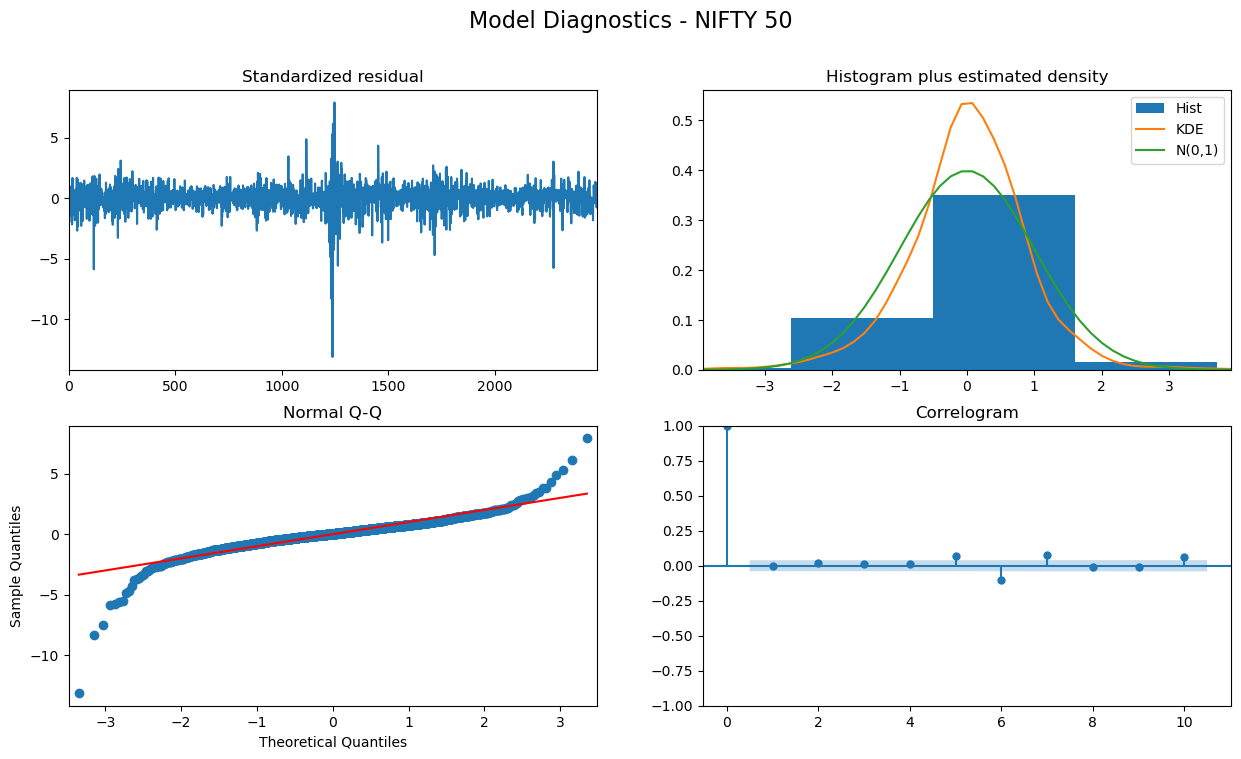

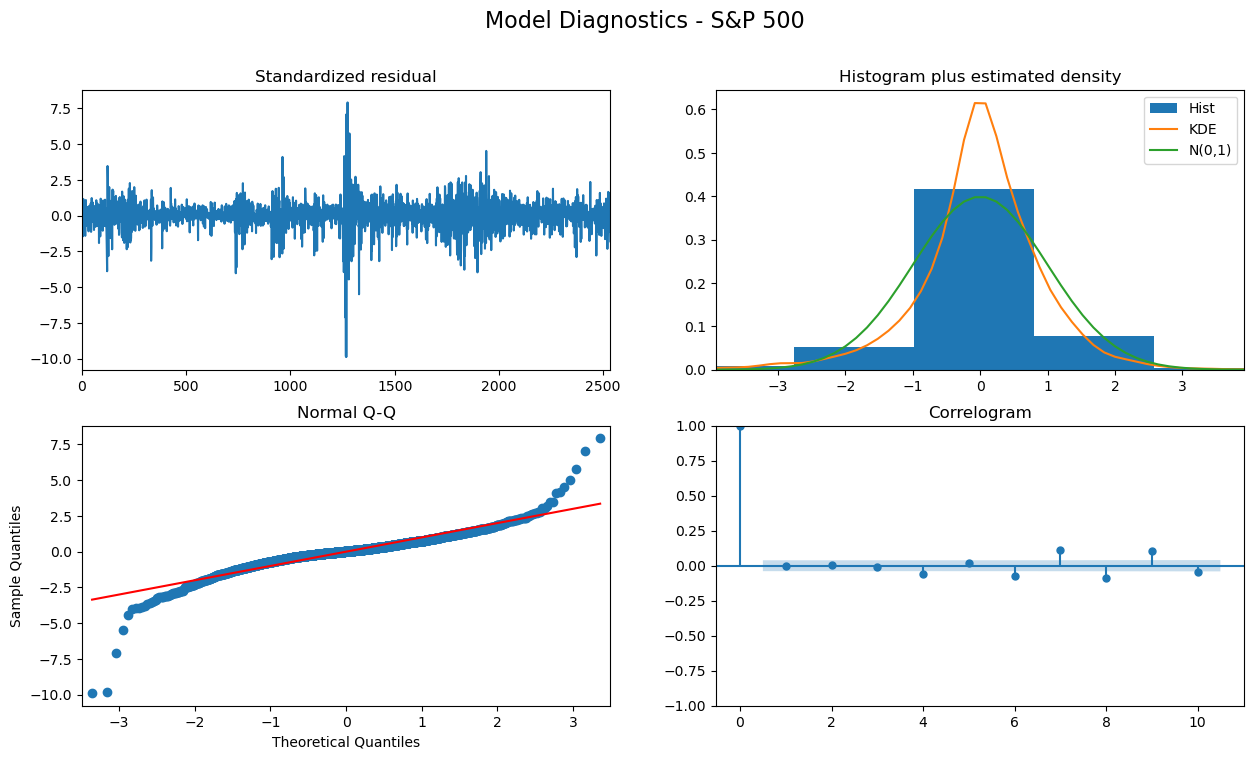

In [21]:
import matplotlib.pyplot as plt

# Diagnostics for NIFTY 50 model
model_nifty.plot_diagnostics(figsize=(15, 8))
plt.suptitle("Model Diagnostics - NIFTY 50", fontsize=16)
plt.show()

# Diagnostics for S&P 500 model
model_sp500.plot_diagnostics(figsize=(15, 8))
plt.suptitle("Model Diagnostics - S&P 500", fontsize=16)
plt.show()


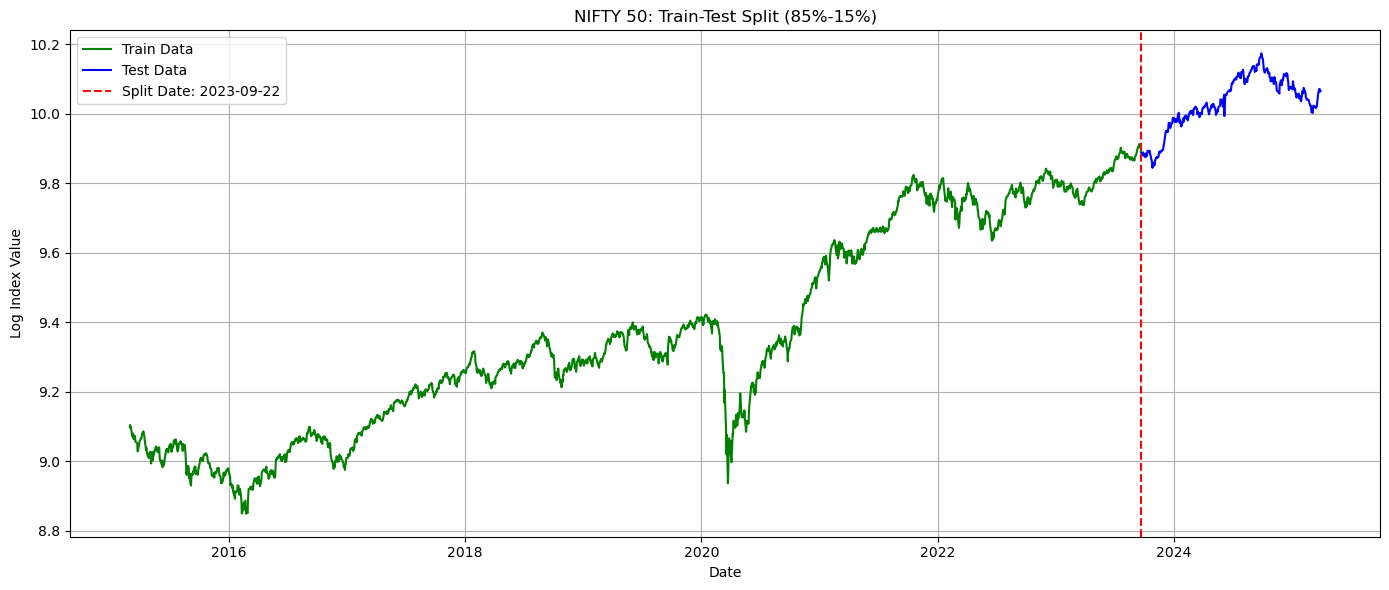

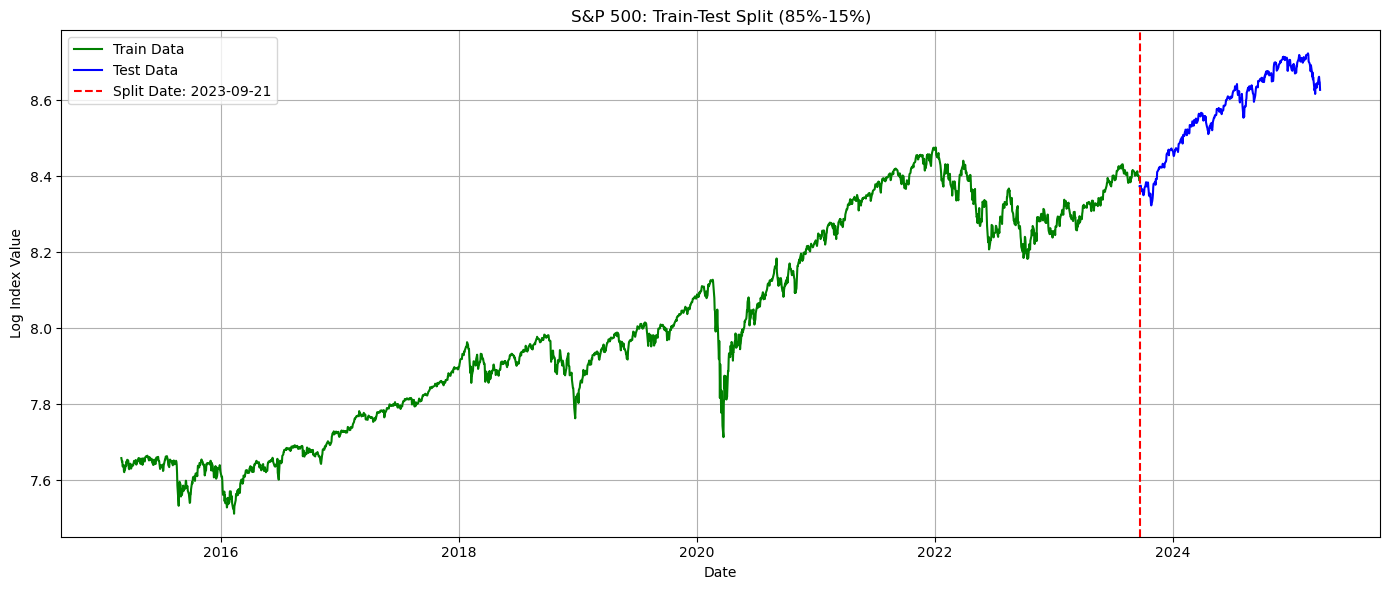

In [57]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure datetime index
df_nifty_log.index = pd.to_datetime(df_nifty_log.index)
df_sp500_log.index = pd.to_datetime(df_sp500_log.index)

# Function to split into 85:15
def split_data(series):
    split_index = int(len(series) * 0.85)
    train = series.iloc[:split_index]
    test = series.iloc[split_index:]
    return train, test

# Split NIFTY and S&P
train_nifty, test_nifty = split_data(df_nifty_log)
train_sp500, test_sp500 = split_data(df_sp500_log)

# ========== Plot for NIFTY ==========
plt.figure(figsize=(14, 6), dpi=100)
plt.plot(train_nifty, color='green', label='Train Data')
plt.plot(test_nifty, color='blue', label='Test Data')
split_date_nifty = test_nifty.index[0]
plt.axvline(x=split_date_nifty, color='red', linestyle='--', label=f'Split Date: {split_date_nifty.date()}')
plt.xlabel('Date')
plt.ylabel('Log Index Value')
plt.title('NIFTY 50: Train-Test Split (85%-15%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ========== Plot for S&P 500 ==========
plt.figure(figsize=(14, 6), dpi=100)
plt.plot(train_sp500, color='green', label='Train Data')
plt.plot(test_sp500, color='blue', label='Test Data')
split_date_sp500 = test_sp500.index[0]
plt.axvline(x=split_date_sp500, color='red', linestyle='--', label=f'Split Date: {split_date_sp500.date()}')
plt.xlabel('Date')
plt.ylabel('Log Index Value')
plt.title('S&P 500: Train-Test Split (85%-15%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [26]:
from statsmodels.tsa.arima.model import ARIMA

# --- Build and train ARIMA(1,1,0) for NIFTY 50 ---
model_nifty = ARIMA(train_nifty, order=(1, 1, 0))
fitted_nifty = model_nifty.fit()
print("NIFTY 50 Model Summary:")
print(fitted_nifty.summary())

# --- Build and train ARIMA(2,1,0) for S&P 500 ---
model_sp500 = ARIMA(train_sp500, order=(2, 1, 0))
fitted_sp500 = model_sp500.fit()
print("\nS&P 500 Model Summary:")
print(fitted_sp500.summary())


NIFTY 50 Model Summary:
                               SARIMAX Results                                
Dep. Variable:                  ^NSEI   No. Observations:                 2108
Model:                 ARIMA(1, 1, 0)   Log Likelihood                6545.677
Date:                Mon, 21 Apr 2025   AIC                         -13087.354
Time:                        12:18:32   BIC                         -13076.048
Sample:                             0   HQIC                        -13083.213
                               - 2108                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0221      0.012     -1.878      0.060      -0.045       0.001
sigma2         0.0001   1.33e-06     88.387      0.000       0.000       0.000
Ljung-Box (L1) (Q):         

/Users/ayushrana/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ayushrana/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ayushrana/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ayushrana/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be

/Users/ayushrana/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/ayushrana/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


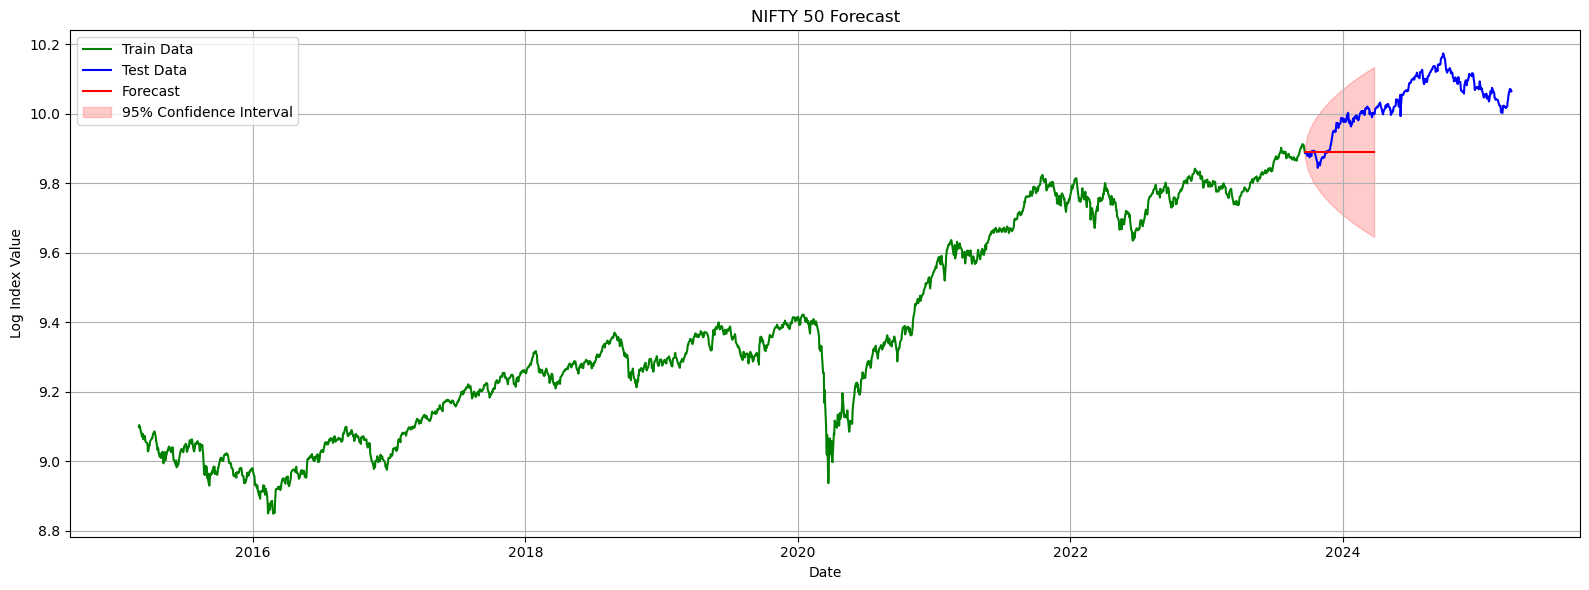

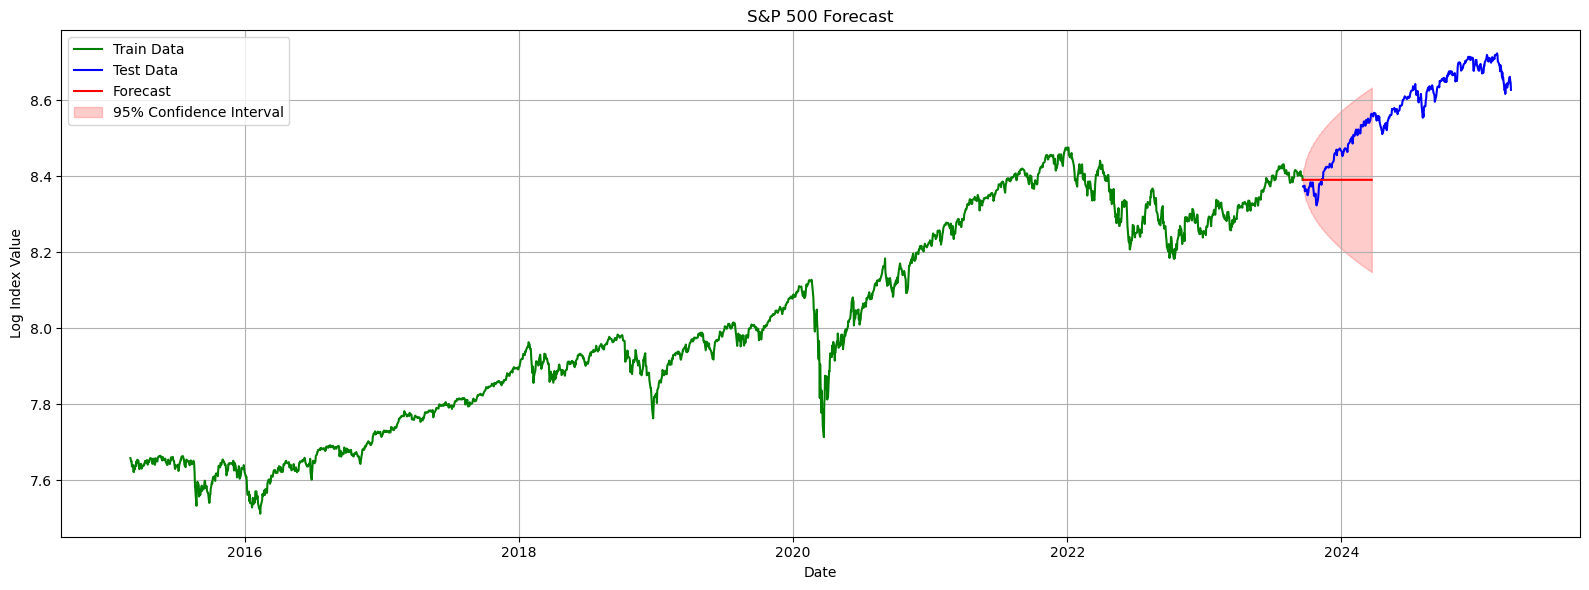

In [55]:
# Forecast next 132 business days (approx. 6 months)
forecast_steps = 132

# Get forecast objects
forecast_obj_nifty = fitted_nifty.get_forecast(steps=forecast_steps)
forecast_obj_sp500 = fitted_sp500.get_forecast(steps=forecast_steps)

# Extract forecast summary frames
forecast_df_nifty = forecast_obj_nifty.summary_frame(alpha=0.05)
forecast_df_sp500 = forecast_obj_sp500.summary_frame(alpha=0.05)

# Extract forecast values and confidence intervals
forecast_nifty = forecast_df_nifty['mean']
conf_int_nifty = forecast_df_nifty[['mean_ci_lower', 'mean_ci_upper']]

forecast_sp500 = forecast_df_sp500['mean']
conf_int_sp500 = forecast_df_sp500[['mean_ci_lower', 'mean_ci_upper']]

# Generate forecast date index
forecast_nifty.index = pd.date_range(start=train_nifty.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='B')
forecast_sp500.index = pd.date_range(start=train_sp500.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='B')

# ========== Plot Forecast for NIFTY ==========
plt.figure(figsize=(16, 6))
plt.plot(train_nifty, color='green', label='Train Data')
plt.plot(test_nifty, color='blue', label='Test Data')
plt.plot(forecast_nifty, color='red', label='Forecast')
plt.fill_between(forecast_nifty.index,
                 conf_int_nifty['mean_ci_lower'],
                 conf_int_nifty['mean_ci_upper'],
                 color='red', alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Log Index Value')
plt.title('NIFTY 50 Forecast')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ========== Plot Forecast for S&P 500 ==========
plt.figure(figsize=(16, 6))
plt.plot(train_sp500, color='green', label='Train Data')
plt.plot(test_sp500, color='blue', label='Test Data')
plt.plot(forecast_sp500, color='red', label='Forecast')
plt.fill_between(forecast_sp500.index,
                 conf_int_sp500['mean_ci_lower'],
                 conf_int_sp500['mean_ci_upper'],
                 color='red', alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Log Index Value')
plt.title('S&P 500 Forecast')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-13082.390, Time=0.69 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-13088.853, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-13088.001, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-13087.968, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-13088.324, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-13086.061, Time=0.16 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.172 seconds
Best ARIMA model for NIFTY 50: (0, 1, 0)


/Users/ayushrana/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


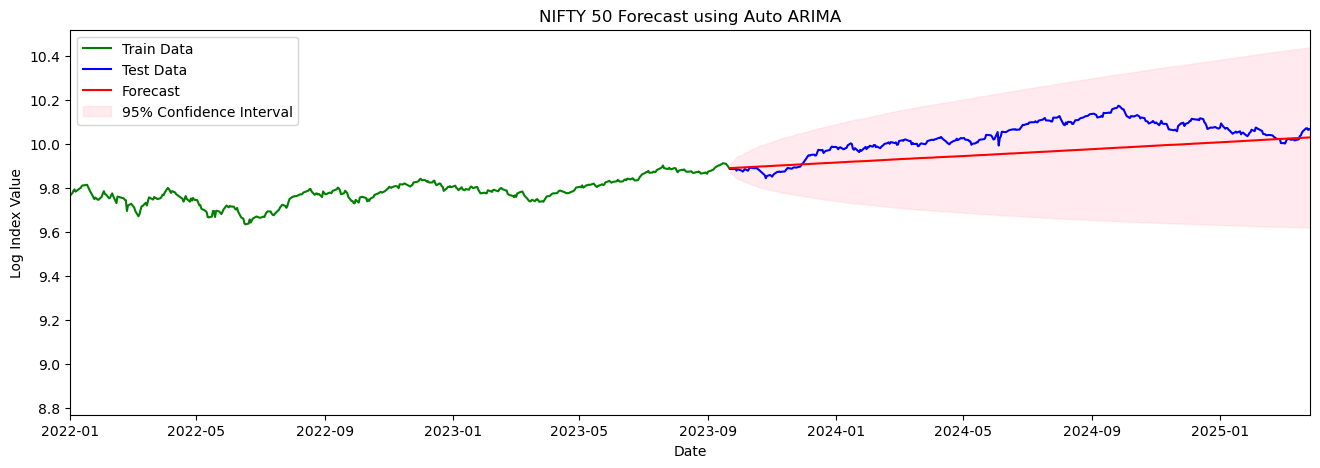

NIFTY 50 - MAE: 0.0770, RMSE: 0.0898


In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error

# --- Auto ARIMA for NIFTY 50 ---
model_nifty_auto = auto_arima(train_nifty, seasonal=False, stepwise=True, trace=True, suppress_warnings=True)
print("Best ARIMA model for NIFTY 50:", model_nifty_auto.order)
model_nifty_auto.fit(train_nifty)

# Forecasting
forecast_steps = len(test_nifty)
forecast_nifty_auto = model_nifty_auto.predict(n_periods=forecast_steps, return_conf_int=True, alpha=0.05)
forecast_nifty_values, conf_int_nifty = forecast_nifty_auto
forecast_index_nifty = test_nifty.index

# --- Plot for NIFTY 50 ---
plt.figure(figsize=(16, 5))
plt.plot(train_nifty, label='Train Data', color='green')
plt.plot(test_nifty, label='Test Data', color='blue')
plt.plot(forecast_index_nifty, forecast_nifty_values, label='Forecast', color='red')

# Confidence Interval
plt.fill_between(forecast_index_nifty,
                 conf_int_nifty[:, 0],
                 conf_int_nifty[:, 1],
                 color='pink', alpha=0.3, label='95% Confidence Interval')

plt.title("NIFTY 50 Forecast using Auto ARIMA")
plt.xlabel("Date")
plt.ylabel("Log Index Value")
plt.legend()
plt.xlim(pd.to_datetime("2022-01-01"), forecast_index_nifty[-1])
plt.show()

# Accuracy Metrics
mae_nifty = mean_absolute_error(test_nifty, forecast_nifty_values)
rmse_nifty = np.sqrt(mean_squared_error(test_nifty, forecast_nifty_values))
print(f"NIFTY 50 - MAE: {mae_nifty:.4f}, RMSE: {rmse_nifty:.4f}")
